In [1]:
 # 3.1 Simulating Random Coin Flips and Die Rolls using NumPy
import numpy as np
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [2]:
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5,6,1]

In [3]:
# Generating a random coin flip
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [4]:
# Sequence of 10 coins
np.random.seed(0)

# Function to count the frequency of heads in a sequence of coins
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    # total_heads = sum(coin_flip_sequence)
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


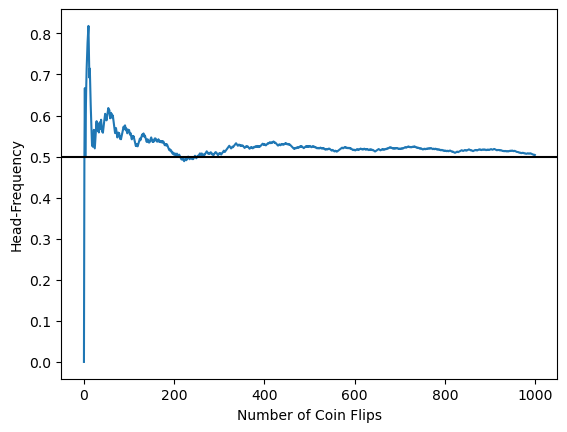

In [6]:
import matplotlib.pyplot as plt
# Flip the coin 1000 times
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

# Plotting the frequency against the coin_flip number along with the 0.5 frequency line
plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()
# The more coins we flip, the closer the plotted line becomes the horizontal line

In [7]:
# 3.1.1 Analyzing Biased Coin Flips
np.random.seed(0)
print(f"Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print(f"\nLet's flips the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of {number_coin_flips} biased coin flips."))

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flips the biased coin 10 times.
6 heads were observed out of 10 biased coin flips.


In [8]:
# Flipping the biased coin 1000 times
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [9]:
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print(f"Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [10]:
# 3.2 Computing confidence intervals using histograms and NumPy arrays
# flipping the biased coin 1000 * 500 times
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [12]:
# More efficient with NumPy optomization
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [13]:
assert head_count_array.tolist() == head_count_list

In [14]:
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [16]:
# Easily divide a whole array of numbers
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

In [17]:
# Printing a NumPy frequency array
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [19]:
# Seeing the differences in the head frequency in 500 1000 sequence flips
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference accross frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference accross frequency range: 0.07699999999999996


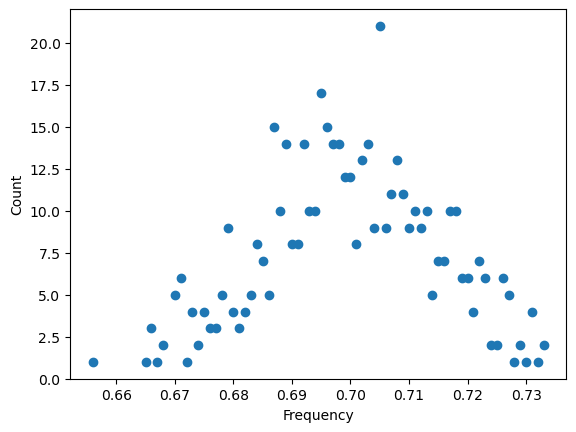

In [21]:
from collections import defaultdict
from itertools import product
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1
    
frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

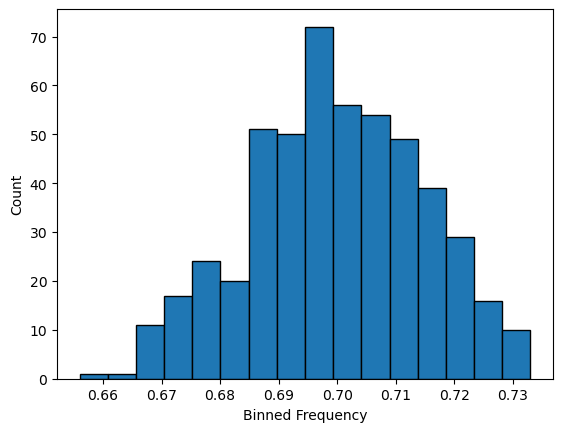

In [24]:
# 3.2.1 Binning similar points in histogram plots
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


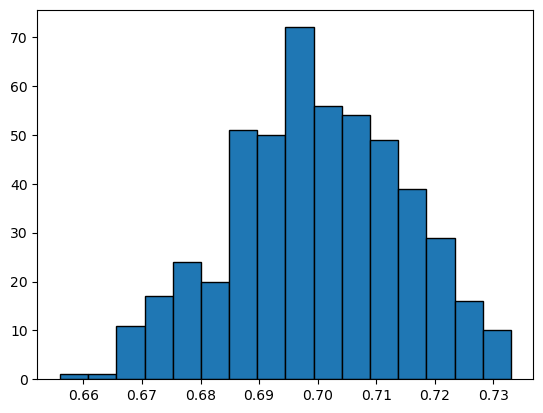

In [25]:
# The first variable returned by plt.hist() is the total counts of each bin
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


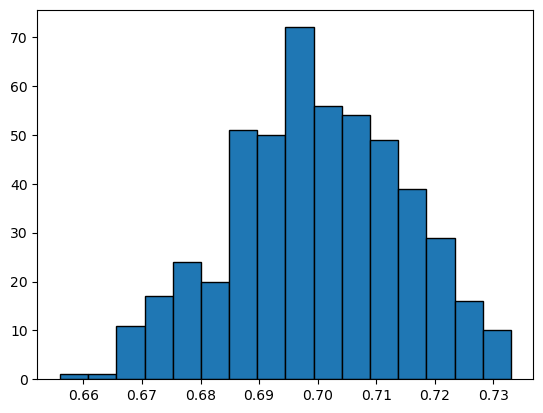

In [33]:
# Then second variable returned by plt.hist() is the bin edges on the x axis
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [39]:
# Getting a bin's frequency and size
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print(f"The bin for frequency range {range_string} contains {count} element{'' if count == 1 else 's'}")
    
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [40]:
assert counts[counts.argmax()] == counts.max()

In [41]:
# Using argmax() to return histogram's peak
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


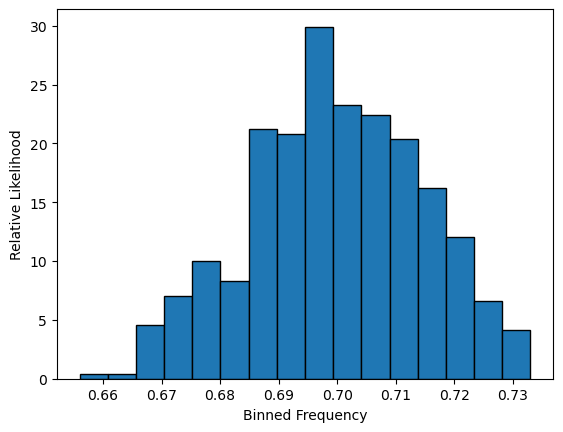

In [42]:
# 3.2.2 Deriving probabilities from histograms
# Plotting a histogram's relative likelihoods
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [43]:
# Computing the total area under a histogram
assert likelihoods.sum() * bin_width == 1.0

In [44]:
# Computing the probability of the peak frequencies
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [45]:
# Increasing the probability of a frequency range (expand the range lol)
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [46]:
# Computing a high confidence interval (>= 95%)
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < (likelihoods.size - 1):
            end_index += 1
            
        area = likelihoods[start_index : end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start} - {range_end}"
    print(f"The frequency range {range_string} represents a {100 * area:.2f}% confidence interval")
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.6704375 - 0.723375 represents a 95.40% confidence interval


(3, 14)

In [50]:
# 3.2.3 Shrinking the range of a high confidence interval
# Sample 100,000 cases instead of 500
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.6704285714285715 - 0.7278571428571429 represents a 95.42% confidence interval


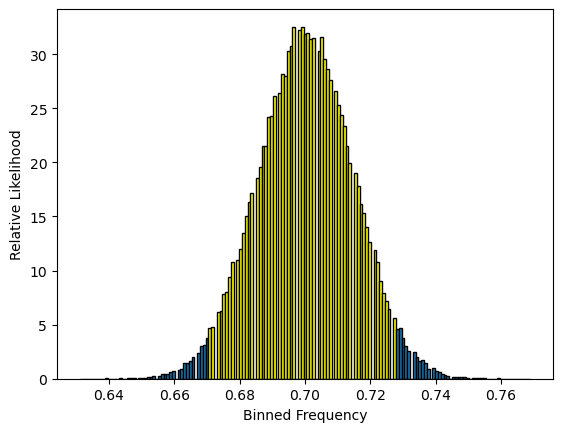

In [51]:
# Coloring histogram bars over an interval
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The frequency range 0.6957690566037736 - 0.7037079245283019 represents a 95.06% confidence interval


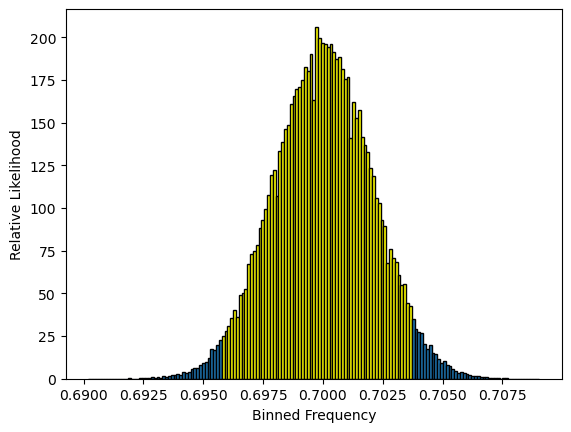

In [52]:
# Sampling 5 billion flipped coins
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [53]:
# 3.2.4 Computing histograms in NumPy
# Don't need to call plt.hist() because it already calls np.histogram()
# Try just using the np.histogram() without any visualization:
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.6957690566037736 - 0.7037079245283019 represents a 95.06% confidence interval


(47, 114)

In [55]:
# 3.3 Using Confidence intervals to analyze a biased deck of cards
# Generate a 52 card deck with an uneven amount of black and red cards|
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [58]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    
    # check to see if its a generic set and not a dictionary
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    
    # otherwise, deal with the weights of the in the sample space dictionary
    event_size = sum(generic_sample_space[outcome] for outcome in event)
    
    return event_size / sum(generic_sample_space.values())

def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space if event_condition(outcome)])

In [59]:
weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

In [60]:
assert prob_red == red_card_count / total_cards

In [61]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [62]:
# shuffle the deck 10 times and see how many times a red is drawn
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


In [63]:
# shuffling the deck 50000 times and redo the shuffle procedure 100000 times
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.8491394594594595 represents a 95.16% confidence interval


In [64]:
# Ranging out how many cards are in the deck
range_start = round(0.842865 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [65]:
# Check solution 
if red_card_count == 44:
    print(f"We are correct! There are 44 red cards in the deck")
else:
    print(f"Oops! Our sampling estimation was wrong.")

We are correct! There are 44 red cards in the deck


In [66]:
# 3.4 Using Permutations to Shuffle Cards
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [ ]:
import itertools

In [67]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


In [68]:
print(type(shuffled_deck))

<class 'numpy.ndarray'>


In [69]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [71]:
# Seeing if it actually made a permutations
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [72]:
# Checking if more permutations occur than others with a weighted sample space
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1
    
for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [73]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


In [74]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


In [ ]:
# Key Words / Notes:
# Binomial Distribution: A generic distribution that captures coin-flip probabilities
# When a coin is flipped repeadly, its frequency of heads converges toward the actual probability of heads
#     However, the final frequency might differ a little from the actual probability
# Histogram: Binned counts of observed numeric values
# Confidence Interval: The likelihood that an unknown probability falls within a certain frequency rangr (prefer 95%+)
# Gaussian/Normal Distribution: A bell-shaped curve that is seen throughout math and statistics
# Permutation: A random ordering of a collection of elements